# Setup

In [ ]:
import pandas as pd
import networkx as nx
import os

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set Working Directory

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Social_Interactions/')

# Data Load

In [ ]:
#Load DataFrame for parties
df_CVP = pd.read_csv('Data/df_CVP.csv', on_bad_lines='skip')
df_SVP = pd.read_csv('Data/df_SVP.csv', on_bad_lines='skip')
df_SP = pd.read_csv('Data/df_SP.csv', on_bad_lines='skip')

#Load DataFrame for 'Fraktionen'
df_fraktion_left = pd.read_csv('Data/df_left_Fraktionen.csv', on_bad_lines='skip')
df_fraktion_right = pd.read_csv('Data/df_right_Fraktionen.csv', on_bad_lines='skip')

In [ ]:
#Cut DataFrame to needed informations
df_CVP = df_CVP[['AffairShortId', 'CouncillorId', 'CouncillorYes', 'CouncillorNo']]
df_SVP = df_SVP[['AffairShortId', 'CouncillorId', 'CouncillorYes', 'CouncillorNo']]
df_SP = df_SP[['AffairShortId', 'CouncillorId', 'CouncillorYes', 'CouncillorNo']]

df_left = df_fraktion_left[['AffairShortId', 'CouncillorId', 'CouncillorYes', 'CouncillorNo']]
df_right = df_fraktion_right[['AffairShortId', 'CouncillorId', 'CouncillorYes', 'CouncillorNo']]

In [ ]:
#Drop NA-Values
df_CVP = df_CVP.dropna()
df_SVP = df_SVP.dropna()
df_SP = df_SP.dropna()

df_left = df_left.dropna()
df_right = df_right.dropna()

# First Look

In [ ]:
l_names_CVP = list(set(df_CVP['CouncillorId']))
print('Number of Councillors in CVP during Legislature: ', len(l_names_CVP))

l_names_SVP = list(set(df_SVP['CouncillorId']))
print('Number of Councillors in SVP during Legislature: ', len(l_names_SVP))

l_names_SP = list(set(df_SP['CouncillorId']))
print('Number of Councillors in SP during Legislature: ', len(l_names_SP))

l_names_left = list(set(df_left['CouncillorId']))
print('Number of Councillors in Fraktion left during Legislature: ', len(l_names_left))

l_names_right = list(set(df_right['CouncillorId']))
print('Number of Councillors in Fraktion right during Legislature: ', len(l_names_right))

Number of Councillors in CVP during Legislature:  23
Number of Councillors in SVP during Legislature:  55
Number of Councillors in SP during Legislature:  34
Number of Councillors in Fraktion left during Legislature:  82
Number of Councillors in Fraktion right during Legislature:  90


In [ ]:
l_affairs = list(set(df_CVP['AffairShortId']))

print('Number of Affairs during Legislature: ', len(l_affairs))

Number of Affairs during Legislature:  1709


# Create Network

In [ ]:
#Function to create dict with lists of councillors who agreed per affair
def dict_agree(df, list_affairs):
  dict_data = {}
  for i in list_affairs:
    df_use = df.loc[df['AffairShortId'] == i]
    df_agree = df_use.loc[df_use['CouncillorYes'] == 1]
    dict_data[i] = list(set(df_agree['CouncillorId']))
  print(len(dict_data))
  return dict_data

In [ ]:
#Use the above createt function
dict_agree_CVP = dict_agree(df_CVP,l_affairs)
dict_agree_SVP = dict_agree(df_SVP,l_affairs)
dict_agree_SP = dict_agree(df_SP,l_affairs)

dict_agree_left = dict_agree(df_left, l_affairs)
dict_agree_right = dict_agree(df_right,l_affairs)

1709
1709
1709
1709
1709


In [ ]:
#Build DataFrame
df_agree_CVP = pd.DataFrame.from_dict(dict_agree_CVP,orient='index')
df_agree_SVP = pd.DataFrame.from_dict(dict_agree_SVP, orient='index')
df_agree_SP = pd.DataFrame.from_dict(dict_agree_SP, orient='index')

df_agree_left = pd.DataFrame.from_dict(dict_agree_left, orient='index')
df_agree_right = pd.DataFrame.from_dict(dict_agree_right, orient='index')

In [ ]:
#Replace NA-Values by 0
df_agree_CVP = df_agree_CVP.fillna(0)
df_agree_SVP = df_agree_SVP.fillna(0)
df_agree_SP = df_agree_SP.fillna(0)

df_agree_left = df_agree_left.fillna(0)
df_agree_right = df_agree_right.fillna(0)

In [ ]:
#Function with edges in form of tuple
def list_edges(df_agree):
  list_edges = []
  for i in range(len(df_agree)):
    list_tp = []
    l_agree = list(df_agree.iloc[[i]].values[0])
    for x in range(len(l_agree)):
      x_1 = int(l_agree[x])
      for y in range(len(l_agree)):
        x_2 = int(l_agree[y])
        if x_1 == x_2:
          next
        else:
          tp = (x_1, x_2)
          if 0 in tp:
            next
          else:
            list_tp.append(tp)

    list_edges.append(list_tp)
  return list_edges
          

In [ ]:
#Use above function
list_edges_CVP = list_edges(df_agree_CVP)
list_edges_SVP = list_edges(df_agree_SVP)
list_edges_SP = list_edges(df_agree_SP)

list_edges_left = list_edges(df_agree_left)
list_edges_right = list_edges(df_agree_right)

In [ ]:
#Function to calculate weights
##Weights = number of agreements within the 1709 affairs

def dict_weights(l_edges):
  dict_use = {}

  for i in l_edges:
    for x in i:
      if x in dict_use:
        dict_use[x] += 1
      else:
        dict_use[x] = 1
  return dict_use


In [ ]:
#Use above function
d_weights_CVP = dict_weights(list_edges_CVP)
d_weights_SVP = dict_weights(list_edges_SVP)
d_weights_SP = dict_weights(list_edges_SP)

d_weights_left = dict_weights(list_edges_left)
d_weights_right = dict_weights(list_edges_right)

In [ ]:
#Create function that makes tuples with edges and the associated weight

def tuple_creator(dict_w, output):
  list_w_edges = []
  list_w_edges_dict = []
  for i in dict_w:
    x = list(i)
    x.insert(2,dict_w[i])
    
    a = x[0]
    b = x[1]
    c = x[2]

    tp = (a,b,c)
    tp_dict = (a,b,{'weights': c})

    list_w_edges.append(tp)
    list_w_edges_dict.append(tp_dict)
  
  if output == 'tp':
    return list_w_edges
  elif output == 'tp_dict':
    return list_w_edges_dict

In [ ]:
#Use above functions
list_w_edges_CVP_dict = tuple_creator(d_weights_CVP, 'tp_dict')
list_w_edges_CVP = tuple_creator(d_weights_CVP, 'tp')

list_w_edges_SVP_dict = tuple_creator(d_weights_SVP, 'tp_dict')
list_w_edges_SVP = tuple_creator(d_weights_SVP, 'tp')

list_w_edges_SP_dict = tuple_creator(d_weights_SP, 'tp_dict')
list_w_edges_SP = tuple_creator(d_weights_SP, 'tp')

list_w_edges_left_dict = tuple_creator(d_weights_left, 'tp_dict')
list_w_edges_left = tuple_creator(d_weights_left, 'tp')

list_w_edges_right_dict = tuple_creator(d_weights_right, 'tp_dict')
list_w_edges_right = tuple_creator(d_weights_right, 'tp')


In [ ]:
#Function that creats graph object with nodes and weighted edges
def create_graph(nodes, edges):
  H = nx.Graph()
  H.add_nodes_from(nodes)
  H.add_weighted_edges_from(edges,distance='weight')
  return H

In [ ]:
#Use above function
graph_CVP = create_graph(l_names_CVP, list_w_edges_CVP)
graph_SVP = create_graph(l_names_SVP, list_w_edges_SVP)
graph_SP = create_graph(l_names_SP, list_w_edges_SP)

graph_left = create_graph(l_names_left, list_w_edges_left)
graph_right = create_graph(l_names_right, list_w_edges_right)

# Plot created networkx

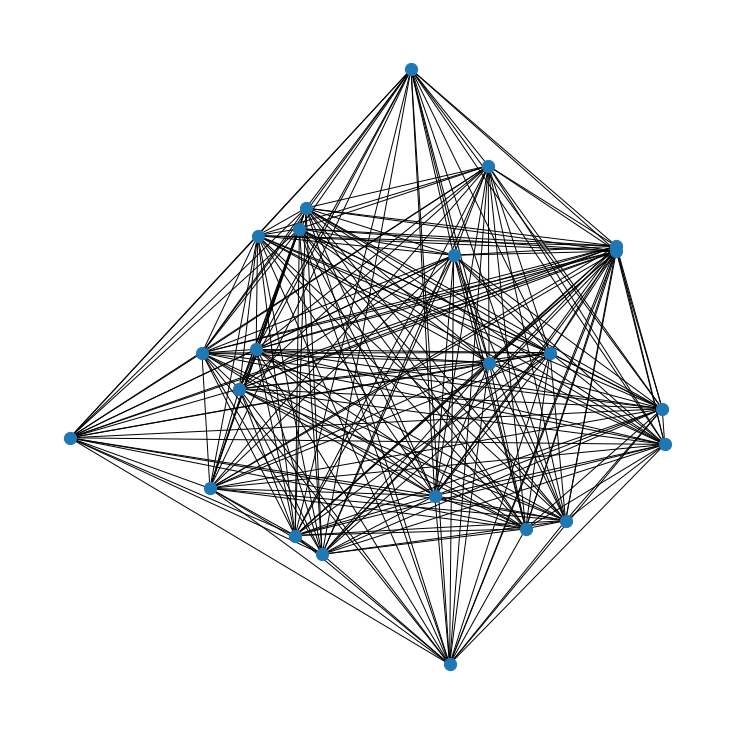

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph_CVP, node_size = 150)

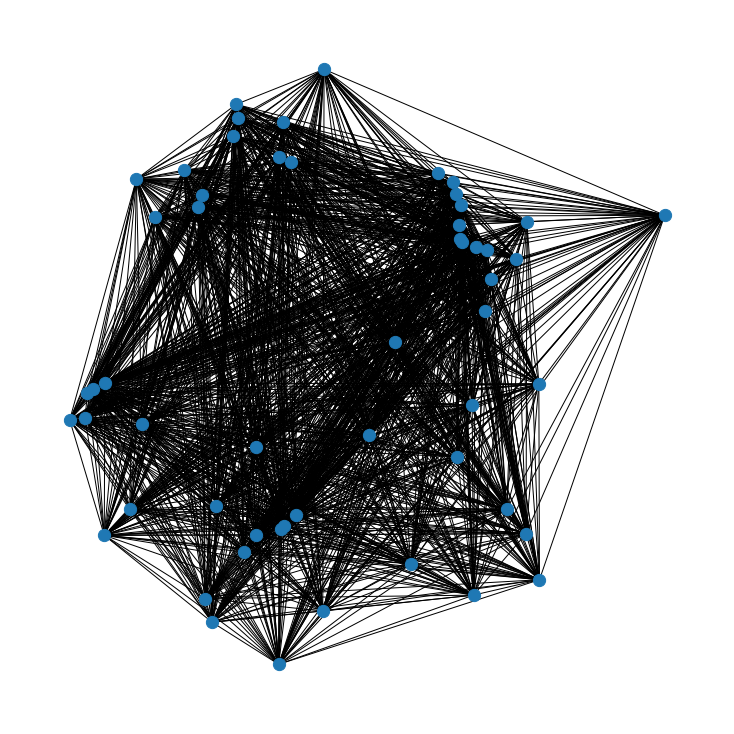

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph_SVP, node_size = 150)

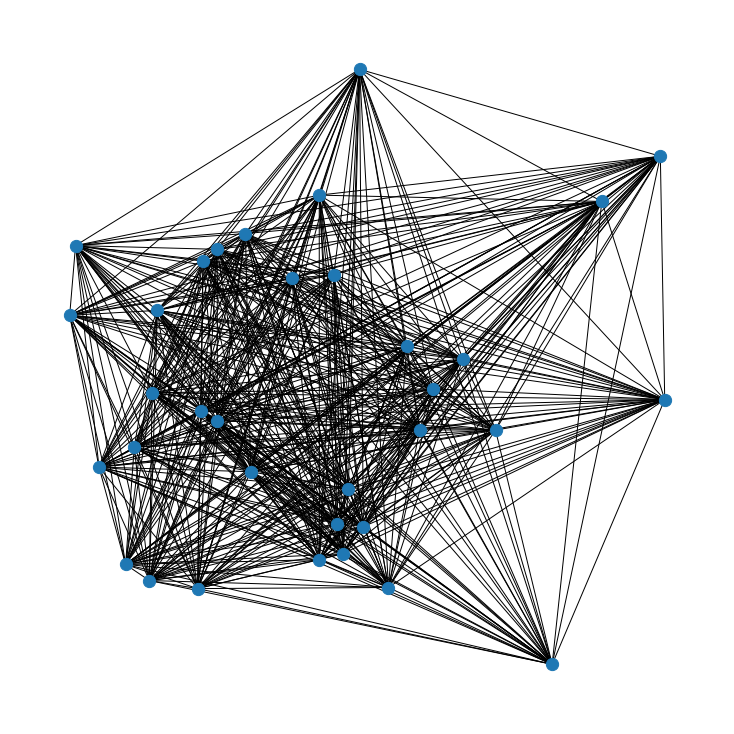

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph_SP, node_size = 150)

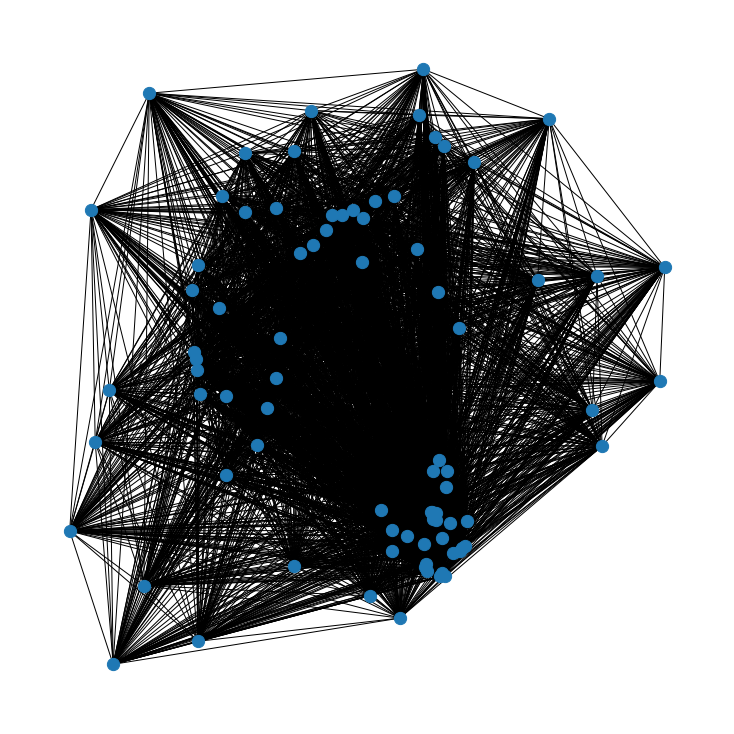

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph_left, node_size = 150)

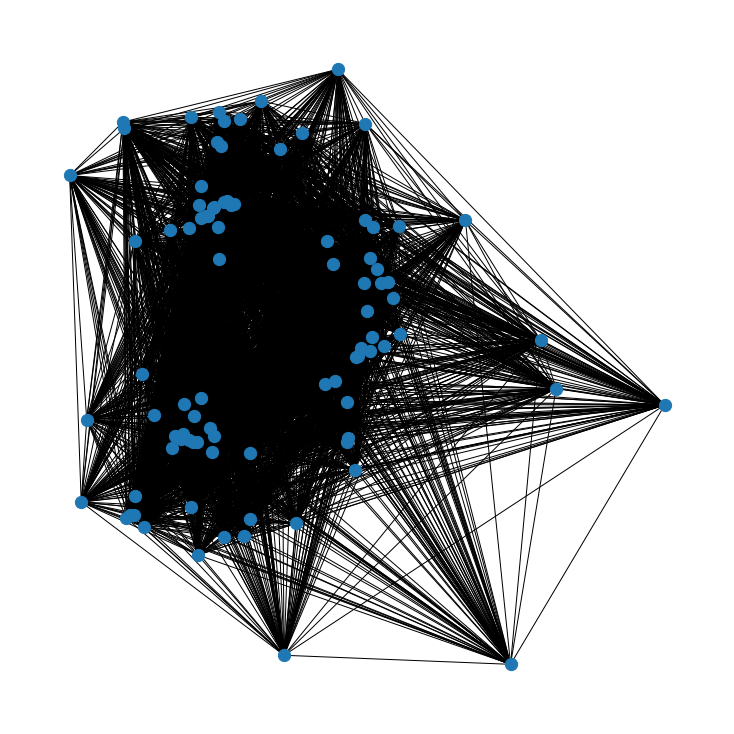

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph_right, node_size = 150)

# Calculate Centrality Measurements

In [ ]:
#Function to calculate centrality
def closeness_centrality_df_creator(graph):
  H_close = nx.closeness_centrality(graph, distance='weight')
  df_closeness = pd.DataFrame.from_dict(H_close, orient='index', columns=['Closeness_Centrality'])
  return df_closeness

In [ ]:
#Use above function
df_closeness_CVP = closeness_centrality_df_creator(graph_CVP)
df_closeness_SVP = closeness_centrality_df_creator(graph_SVP)
df_closeness_SP = closeness_centrality_df_creator(graph_SP)

df_closeness_left = closeness_centrality_df_creator(graph_left)
df_closeness_right = closeness_centrality_df_creator(graph_right)

# Check created DataFrames

In [ ]:
df_closeness_CVP.head()

,Closeness_Centrality
4096,0.001792
4097,0.001777
4225,0.003407
4101,0.001771
4118,0.001748


In [ ]:
df_closeness_SVP.head()

,Closeness_Centrality
4098,0.001265
514,0.002281
4100,0.001284
1159,0.001260
4103,0.001274


In [ ]:
df_closeness_SP.head()

,Closeness_Centrality
4223,0.002866
4224,0.002893
4226,0.003170
1156,0.002064
4228,0.003938


In [ ]:
df_closeness_left.head()

,Closeness_Centrality
4096,0.002778
4097,0.002748
4101,0.002762
4102,0.002848
4106,0.002477


In [ ]:
df_closeness_right.head()

,Closeness_Centrality
4098,0.001680
514,0.002448
4100,0.001731
4103,0.001667
4110,0.001756


# Save Dataframes in CSV Format

In [ ]:
df_closeness_CVP.to_csv('Data/closeness_CVP.csv')
df_closeness_SVP.to_csv('Data/closeness_SVP.csv')
df_closeness_SP.to_csv('Data/closeness_SP.csv')

df_closeness_left.to_csv('Data/closeness_left.csv')
df_closeness_right.to_csv('Data/closeness_right.csv')